In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Mall_Customers(1).csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [ ]:
x=df
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
#elbow points
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  wcss.append(data.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow points')

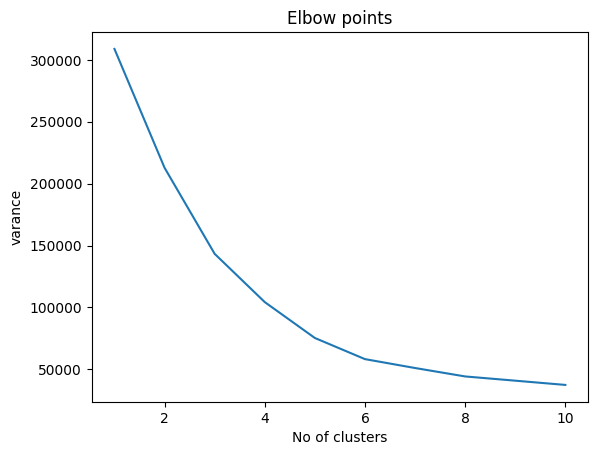

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('varance')
plt.title('Elbow points')

In [ ]:
from sklearn.cluster import KMeans
data1=KMeans(n_clusters=6,init='k-means++',random_state=42)
data1.fit(x)
y=data1.predict(x)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [ ]:
x['cluster']=y
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [ ]:
x1=df.iloc[:,:-1].values
x1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
y1=df.iloc[:,-1].values
y1

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)#randomstate for constant o/p
x_train

,Age,Annual Income (k$),Spending Score (1-100)
169,32,87,63
97,27,60,50
31,21,30,73
12,58,20,15
35,21,33,81
...,...,...,...
106,66,63,50
14,37,20,13
92,48,60,49
179,35,93,90


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[-0.47625237,  0.98322099,  0.4438231 ],
       [-0.83128609, -0.01051573, -0.05203819],
       [-1.25732655, -1.11466765,  0.82525485],
       [ 1.36992295, -1.48271829, -1.38704935],
       [-1.25732655, -1.00425246,  1.13040026],
       [ 0.80186901,  0.24711972,  0.21496404],
       [ 0.65985552, -0.78342208, -0.58604265],
       [-0.1922254 ,  1.57210202,  1.28297297],
       [ 2.07999038, -0.0473208 ,  0.13867769],
       [ 0.37582855,  0.4679501 , -1.69219475],
       [-0.40524563, -0.67300688,  0.32939357],
       [ 0.09180158,  0.39433997,  1.66440472],
       [-1.39934003,  0.76239061, -1.7684811 ],
       [-1.04430632, -0.82022714,  1.5499752 ],
       [ 0.87287575,  0.24711972, -0.31904042],
       [-1.39934003,  0.13670452, -0.20461089],
       [ 0.44683529, -1.18827778, -0.73861536],
       [-0.26323214,  0.50475516,  0.78711168],
       [-1.11531306,  0.0630944 , -0.39532677],
       [-1.39934003,  0.09989946,  0.10053451],
       [-1.32833329, -1.62993855, -1.730

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 2, 2, 2, 5, 2, 5, 2], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmd=confusion_matrix(y_test,y_pred)
cmd

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  1,  0,  0, 12]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9833333333333333

In [ ]:
from sklearn.metrics import classification_report
rept=classification_report(y_test,y_pred)
print(rept)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        13
           5       1.00      0.92      0.96        13

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

